In [9]:
# 匯入必要套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

# 1. 資料讀取
df = pd.read_csv('Automobile_data.csv')

In [10]:
# 2. 資料理解
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [11]:
# 3. 資料前處理
# 用平均值/眾數補空缺，或直接刪除缺失多的欄位
df = df.replace('?', np.nan)
df = df.dropna(subset=['price'])
df['price'] = df['price'].astype(float)
for col in df.columns:
    if df[col].dtype == 'object' and col != 'price':
        df[col].fillna(df[col].mode()[0], inplace=True)
    if df[col].dtype != 'object':
        df[col] = df[col].astype(float)
        df[col].fillna(df[col].mean(), inplace=True)

# 類別型特徵處理
df = pd.get_dummies(df, drop_first=True)

C:\Users\Ding\AppData\Local\Temp\ipykernel_12560\4230532803.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Ding\AppData\Local\Temp\ipykernel_12560\4230532803.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [12]:
# 4. 特徵選擇
X = df.drop(['price'], axis=1)
y = df['price']
selector = SelectKBest(score_func=f_regression, k=15)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("選中特徵:", selected_features)

選中特徵: Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size',
       'city-mpg', 'highway-mpg', 'normalized-losses_161',
       'make_mercedes-benz', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'num-of-cylinders_four', 'num-of-cylinders_six', 'fuel-system_2bbl',
       'fuel-system_mpfi'],
      dtype='object')


In [13]:
# 5. 建模與預測
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [14]:
# 6. 模型評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, RMSE: {rmse}, R²: {r2}')

MSE: 25416111.93039803, RMSE: 5041.439470071819, R²: 0.7922616895402678


C:\Users\Ding\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ding\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ding\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ding\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ding\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170:

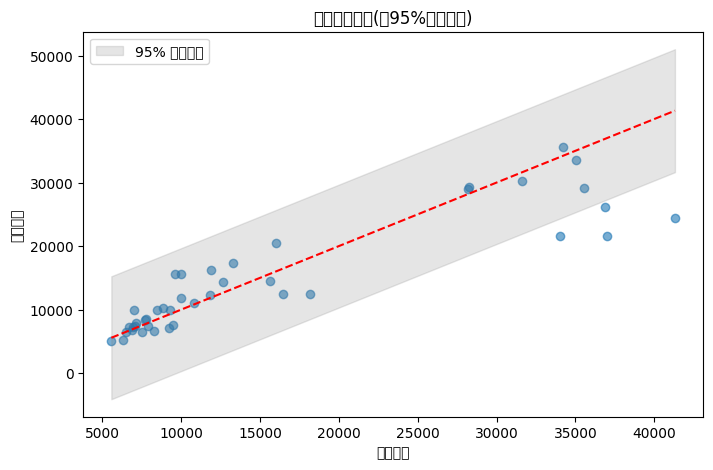

In [15]:
# 視覺化(含95%信賴區間)
import scipy.stats as st
pred_std = np.std(y_pred - y_test)
ci = 1.96 * pred_std
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.fill_between([y_test.min(), y_test.max()],
                 [y_test.min()+ci, y_test.max()+ci],
                 [y_test.min()-ci, y_test.max()-ci],
                 color='gray', alpha=0.2, label="95% 信賴區間")
plt.xlabel('實際價格')
plt.ylabel('預測價格')
plt.title('線性回歸預測(含95%信賴區間)')
plt.legend()
plt.show()